In [1]:
# Importing Libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Loading Data again

dataset2 = load_dataset('lukebarousse/data_jobs')
df2 = dataset2['train'].to_pandas()

In [3]:
# Extract the dataset for only Data Analysts

df_DA = df[df['job_title_short'] == 'Data Analyst']

# Explode the skills column

df_DA_exploded = df_DA.explode('job_skills')

df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [4]:
skill_stats = df_DA_exploded.groupby('job_skills').agg(skill_count = ('job_skills', 'count'),
                                                       median_salary = ('salary_year_avg', 'median'))

skill_stats

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [5]:
skill_stats2 = df_DA_exploded.groupby('job_skills').agg(skill_count = ('job_skills', 'size'),
                                                       median_salary = ('salary_year_avg', 'median'))

skill_stats2

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [6]:
skill_stats3 = df_DA_exploded.groupby('job_skills').agg({'job_skills' : ['count'],'salary_year_avg' : ['median']})

skill_stats3

,job_skills,salary_year_avg
,count,median
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN


In [7]:
skill_stats4 = df_DA_exploded.groupby('job_skills')[['job_skills', 'salary_year_avg']].agg({'job_skills' : 'size', 
                                                                                        'salary_year_avg' : 'median'})

skill_stats4                                                                            

,job_skills,salary_year_avg
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [8]:
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending=False)

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
...,...,...
esquisse,1,NaN
suse,1,NaN
capacitor,1,NaN


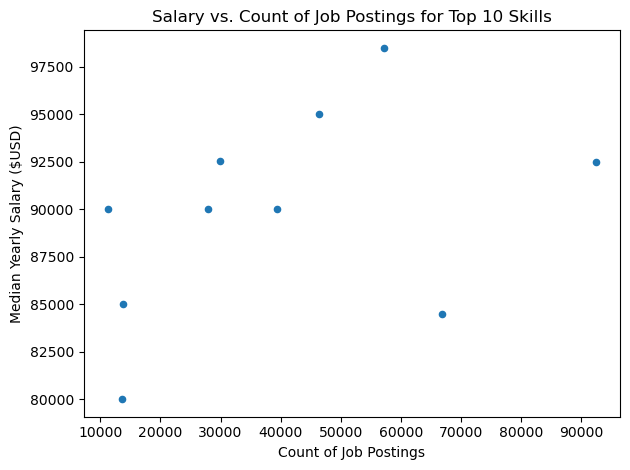

In [9]:
skill_stats = skill_stats.head(10)

skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
plt.show()

In [10]:
for i, txt in enumerate(skill_stats.index) :
    print(i, txt)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


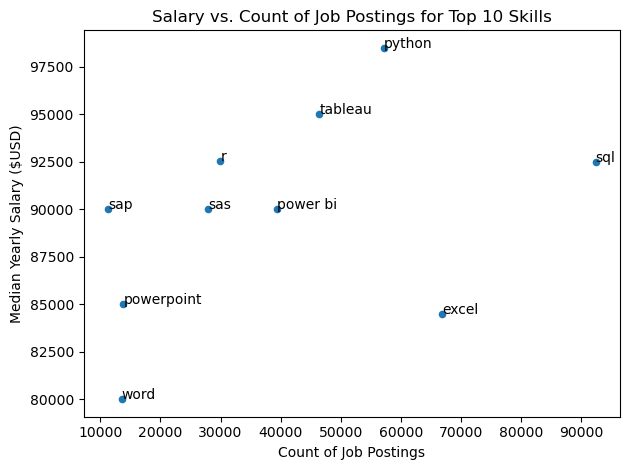

In [11]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
for i, txt in enumerate(skill_stats.index) :
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()



In [12]:
df2.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [13]:
df2.loc[: , ['salary_rate', 'salary_hour_avg']]

,salary_rate,salary_hour_avg
0,None,NaN
1,None,NaN
2,None,NaN
3,None,NaN
4,None,NaN
...,...,...
785736,None,NaN
785737,None,NaN
785738,None,NaN
785739,None,NaN


In [14]:
df_DA_explode_group = df_DA_exploded.groupby('job_skills')[['job_skills', 'salary_year_avg']].agg({'job_skills' :'count',
                                                                                    'salary_year_avg' : 'median'})

df_DA_explode_group

,job_skills,salary_year_avg
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [15]:
column_names = ['skill_count', 'median_salary']

df_DA_explode_group.columns = column_names

df_DA_explode_group

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [16]:
df_DA_explode_group.sort_values('skill_count', ascending = False)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
...,...,...
esquisse,1,NaN
suse,1,NaN
capacitor,1,NaN


In [17]:
columnNames = ['skill_count', 'median_salary']

skill_stats4.columns = columnNames 

skill_stats4

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN
